<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw3/hw3_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/diabetes.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#select required parameters - here, all
varlist =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = df[varlist]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#preprocessing

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#dont normalize outcome - already binary
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Use standard scaler
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [5]:
#randomize and split
from sklearn.model_selection import train_test_split

np.random.seed(12)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
660,0.588235,0.814070,0.688525,0.000000,0.000000,0.412817,0.044406,0.550000,0
69,0.235294,0.733668,0.696721,0.272727,0.118203,0.430700,0.047395,0.100000,0
85,0.117647,0.552764,0.606557,0.292929,0.147754,0.482861,0.264731,0.100000,0
219,0.294118,0.562814,0.540984,0.000000,0.000000,0.563338,0.078138,0.333333,1
712,0.588235,0.648241,0.508197,0.363636,0.000000,0.614009,0.154996,0.283333,1


In [6]:
y_train = df_train.pop('Outcome') # seperate x from y
y_val = df_val.pop('Outcome')

In [7]:
y_train = y_train.to_numpy() # convert to numpy array for matrix multiplication

y_val = y_val.to_numpy()
y_val = y_val.reshape(-1, 1) # reshape


x_train = df_train.to_numpy()
x_val = df_val.to_numpy()


X_0 = np.ones((len(y_train), 1)) # put together input vector
x_train = np.hstack((X_0, x_train))

tmp = np.ones((len(x_val), 1))
x_val = np.hstack((tmp, x_val))

In [ ]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

classifier.fit(x_train, y_train)

In [9]:
y_pred = classifier.predict(x_val)
y_pred[0:9]

array([0, 0, 1, 0, 0, 1, 1, 0, 1])

In [10]:
#Using Confusion matrix we can get accuracy of our model.

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, y_pred)
cnf_matrix

array([[88, 13],
       [28, 25]])

In [11]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Precision:",metrics.precision_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("F1-Score:",metrics.f1_score(y_val, y_pred))

Accuracy: 0.7337662337662337
Precision: 0.6578947368421053
Recall: 0.4716981132075472
F1-Score: 0.5494505494505494


Text(0.5, 427.9555555555555, 'Predicted label')

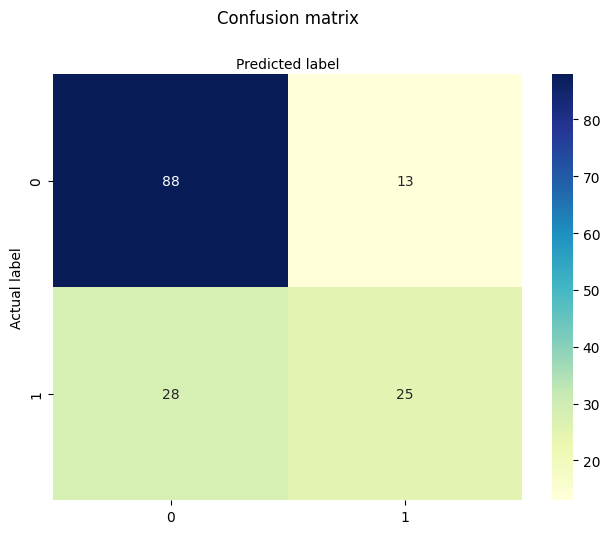

In [12]:
#Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.

import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Just for my own iterest - because the results are so bad

In [22]:
C = [50, 10, 1, .1]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)

    print('C:', c)
    print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
    print("Precision:",metrics.precision_score(y_val, y_pred))
    print("Recall:",metrics.recall_score(y_val, y_pred))
    print("F1-Score:",metrics.f1_score(y_val, y_pred))
    print('')

C: 50
Accuracy: 0.7337662337662337
Precision: 0.6428571428571429
Recall: 0.5094339622641509
F1-Score: 0.568421052631579

C: 10
Accuracy: 0.7337662337662337
Precision: 0.6428571428571429
Recall: 0.5094339622641509
F1-Score: 0.568421052631579

C: 1
Accuracy: 0.7272727272727273
Precision: 0.6341463414634146
Recall: 0.49056603773584906
F1-Score: 0.5531914893617021

C: 0.1
Accuracy: 0.7012987012987013
Precision: 0.8888888888888888
Recall: 0.1509433962264151
F1-Score: 0.25806451612903225

